In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
data = pd.read_csv('D:/data/TabNet samples/robots/CAPIC304R_data.csv')

In [17]:
len(data.groupby('STARTTIME'))

87303

## Prepare Data (to series)

In [30]:
def prepare_data(input_df):
    series_data = []
    indices = np.where(input_df['POINT'].diff(1) < 0)[0]
    
    for i in range(len(indices) - 1):
        if i == 0:
            series = input_df.iloc[:indices[i], :]
        else:
            series = input_df.iloc[indices[i - 1]:indices[i], :]
               
        series_data.append(series)
        
    return series_data

def plot_raw_data(df):
    df = df.reset_index(drop=True)
    fig, ax = plt.subplots(1, 2, figsize=(10, 2.5))

    ax[0].plot(df['TORQUE'])
    ax[0].set_title('Torque')
    ax[0].grid()

    ax[1].plot(df['SPEED'])
    ax[1].set_title('Speed')
    ax[1].grid()

    plt.show()

In [24]:
# prepared_data = prepare_data(data)
prepared_data = list(data.groupby('STARTTIME'))

In [23]:
len(prepared_data)

87301

In [29]:
prepared_data[1][1]

,Unnamed: 0,STARTTIME,CHAMBER,RECIPE,POINT,STEP_NAME,SPEED,TORQUE
74,74,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,1,0,-5,272
75,75,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,2,0,-7,248
76,76,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,3,0,-11,262
77,77,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,4,0,-14,267
78,78,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,5,0,-17,253
...,...,...,...,...,...,...,...,...
239,239,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,166,2,-19,337
240,240,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,167,2,-16,342
241,241,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,168,2,-11,282
242,242,2019-06-22 13:21:21,AXI_2_Z1,CT150_175 MS-425_-450 U3,169,2,-9,327


## Raw Data (time series)

In [33]:
# plot_raw_data(prepared_data[0])
# plot_raw_data(prepared_data[1])
# plot_raw_data(prepared_data[2])
# plot_raw_data(prepared_data[3])
# plot_raw_data(prepared_data[4])
# plot_raw_data(prepared_data[5])

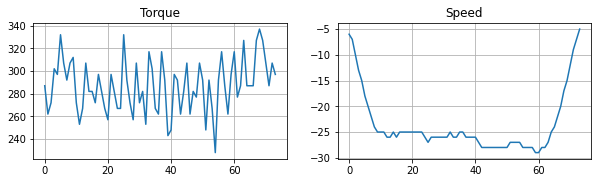

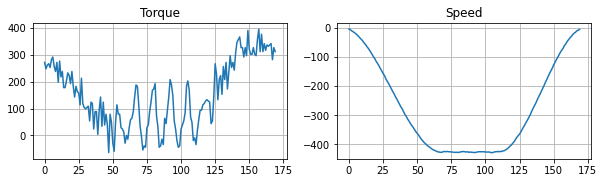

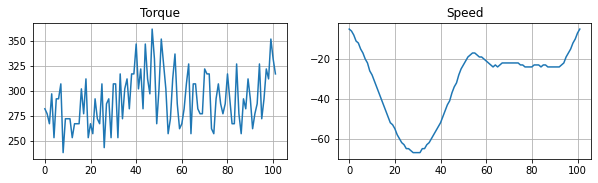

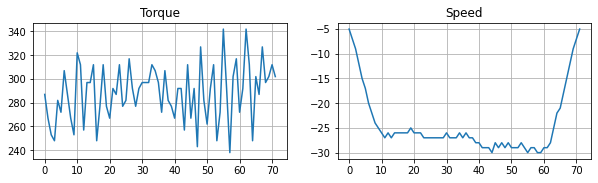

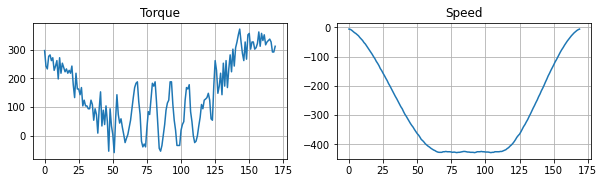

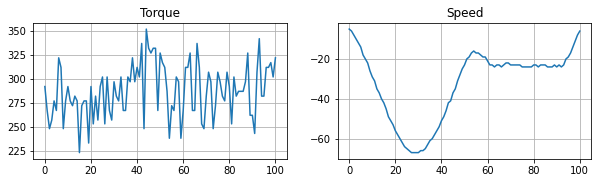

In [31]:
plot_raw_data(prepared_data[0][1])
plot_raw_data(prepared_data[1][1])
plot_raw_data(prepared_data[2][1])
plot_raw_data(prepared_data[3][1])
plot_raw_data(prepared_data[4][1])
plot_raw_data(prepared_data[5][1])

## Statistics

### by step

In [62]:
# stats = {'SPEED': {}, 'TORQUE': {}}

# for i in range(len(prepared_data)):
#     stat = prepared_data[i][1].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.mean)
    
#     for step in range(len(stat)):
#         print(step)
#         stats['SPEED'].setdefault(step, []).append(stat.iloc[step, :]['SPEED'])
#         stats['TORQUE'].setdefault(step, []).append(stat.iloc[step, :]['TORQUE'])

In [61]:
# pd.DataFrame(stats['SPEED'])

In [59]:
stats['SPEED'].keys()

dict_keys([0, 1, 2])

In [42]:
len(prepared_data)

87303

#### mean

In [37]:
prepared_data[0][1].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.mean)

,SPEED,TORQUE
STEP_NAME,,
0,-9.000000,280.750000
1,-25.454545,286.712121
2,-8.250000,299.500000


In [8]:
prepared_data[1].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.mean)

,SPEED,TORQUE
STEP_NAME,,
0,-199.833333,135.033333
1,-424.649123,63.087719
2,-201.018868,267.283019


In [9]:
prepared_data[2].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.mean)

,SPEED,TORQUE
STEP_NAME,,
0,-25.000000,275.222222
1,-60.956522,288.478261
2,-23.229508,298.065574


#### std

In [10]:
prepared_data[0].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.std)

,SPEED,TORQUE
STEP_NAME,,
0,2.738613,15.155445
1,2.965365,23.873254
2,2.586020,8.291562


In [11]:
prepared_data[1].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.std)

,SPEED,TORQUE
STEP_NAME,,
0,132.082823,94.483150
1,3.075034,76.479164
2,132.504110,87.104660


In [12]:
prepared_data[2].groupby('STEP_NAME')[['SPEED', 'TORQUE']].apply(np.std)

,SPEED,TORQUE
STEP_NAME,,
0,13.844373,17.466016
1,5.103096,26.827743
2,7.627374,26.721311


In [13]:
pp_data[1].groupby('STEP_NAME').get_group(0)

NameError: name 'pp_data' is not defined

In [67]:
len(prepared_data[1][1].groupby('STEP_NAME'))

3

In [65]:
np.corrcoef(
    prepared_data[1][1].groupby('STEP_NAME').get_group(0)['SPEED'],
    prepared_data[1][1].groupby('STEP_NAME').get_group(0)['TORQUE']
)[0, 1]

0.9017684917042103

In [ ]:
np.corrcoef(
    pp_data[1].groupby('STEP_NAME').get_group(1)['SPEED'],
    pp_data[1].groupby('STEP_NAME').get_group(1)['TORQUE']
)

In [ ]:
np.corrcoef(
    pp_data[1].groupby('STEP_NAME').get_group(2)['SPEED'],
    pp_data[1].groupby('STEP_NAME').get_group(2)['TORQUE']
)

In [60]:
print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[1].groupby('STEP_NAME').get_group(0)['SPEED'],
    pp_data[1].groupby('STEP_NAME').get_group(0)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[1].groupby('STEP_NAME').get_group(1)['SPEED'],
    pp_data[1].groupby('STEP_NAME').get_group(1)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[1].groupby('STEP_NAME').get_group(2)['SPEED'],
    pp_data[1].groupby('STEP_NAME').get_group(2)['TORQUE']
    )
)

NameError: name 'pp_data' is not defined

In [ ]:
print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[2].groupby('STEP_NAME').get_group(0)['SPEED'],
    pp_data[2].groupby('STEP_NAME').get_group(0)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[2].groupby('STEP_NAME').get_group(1)['SPEED'],
    pp_data[2].groupby('STEP_NAME').get_group(1)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[2].groupby('STEP_NAME').get_group(2)['SPEED'],
    pp_data[2].groupby('STEP_NAME').get_group(2)['TORQUE']
    )
)

In [ ]:
print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[3].groupby('STEP_NAME').get_group(0)['SPEED'],
    pp_data[3].groupby('STEP_NAME').get_group(0)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[3].groupby('STEP_NAME').get_group(1)['SPEED'],
    pp_data[3].groupby('STEP_NAME').get_group(1)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[3].groupby('STEP_NAME').get_group(2)['SPEED'],
    pp_data[3].groupby('STEP_NAME').get_group(2)['TORQUE']
    )
)

In [ ]:
print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[4].groupby('STEP_NAME').get_group(0)['SPEED'],
    pp_data[4].groupby('STEP_NAME').get_group(0)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[4].groupby('STEP_NAME').get_group(1)['SPEED'],
    pp_data[4].groupby('STEP_NAME').get_group(1)['TORQUE']
    )
)

print(
    '----------------------------------------\n',
    np.corrcoef(
    pp_data[4].groupby('STEP_NAME').get_group(2)['SPEED'],
    pp_data[4].groupby('STEP_NAME').get_group(2)['TORQUE']
    )
)